In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

In [2]:
#data set and random noise
n = 25
sigma = 1.0
m, b = -5.0, 15.0

np.random.seed(0)
x = np.linspace(-10,10,n) 
y = m * x + b + np.random.normal(0., sigma, n) # mean , width, number of points

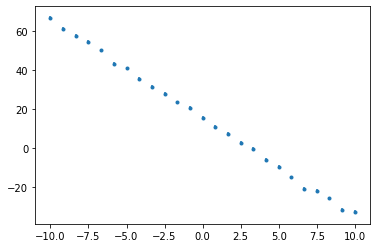

In [3]:
fig = plt.figure('Data Set')
plt.errorbar(x, y, yerr = sigma, fmt='.');

In [4]:
#line function
def f_line(x,m,b): #independent variable goes first (i.e. time, x in this case)
    return m*x + b

In [5]:
def get_chi_squared(x, y, sigma, params):
    '''Returns the chi squared of the fit'''
    RR = 0.0
    #print(sigma)
    for i in range(len(x)):
        y_prime = x[i]*params[0] + params[1]
        RR = RR + ( (y[i] - y_prime)/sigma)**2
    return RR

In [6]:
N = 10000
init_par = np.array([0.0,0.0])
par_list, RRs = [init_par], [get_chi_squared(x, y, sigma, init_par)]

for i in range(N):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5)]
    #print(i,par_list)
    RR_test = get_chi_squared(x,y,sigma,test_par)
    #RRs.append(RR_test)
    #par_list.append(test_par)
    #print(par_list[-1])  
    if (np.random.random() <= (RRs[-1])/RR_test ):
        #add new value to array
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        #add value of array
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs) #find min R2
chisq = RR_min
best_i = RRs.index(RR_min) #Get the index
best_pars = par_list[best_i]  #get the parameters  
print("best m = {0}, best b = {1}, chi**2 = {2}, loc = {3}".format(best_pars[0], best_pars[1], RR_min, best_i) ) 
   

best m = -5.0496609102571774, best b = 15.4507877983151, chi**2 = 26.370441449577505, loc = 8027


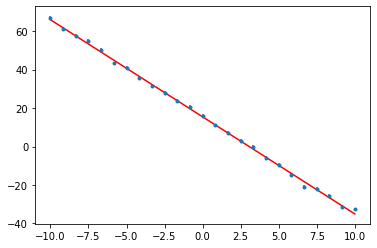

In [7]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(x, y, yerr = sigma, fmt='.')
plt.plot(x,f_line(x,*best_pars),'r');

In [8]:
#check chiq
dof = n - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('Fit Results:\n')
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

Fit Results:

 chi2 =  26.370441449577505 
 dof =  22 
 reduced chi2 =  1.1986564295262503 
 p-value =  0.23611739155861045


[[ 0.          0.        ]
 [-0.72718284  0.02287926]
 [-0.82077476  0.30609928]
 ...
 [-5.79071373 14.56562466]
 [-5.31214573 14.39651101]
 [-5.22621984 13.92126165]]


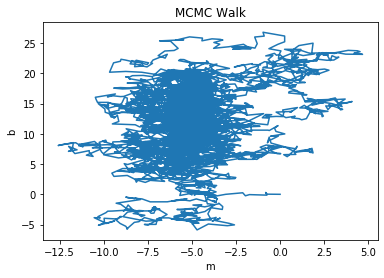

In [9]:
# Plot this stuff
ps = np.array(par_list)
print(ps)
fig1 = plt.figure(1)
plt.plot(ps[:,0], ps[:,1])
plt.xlabel("m")
plt.ylabel("b")
plt.title("MCMC Walk");

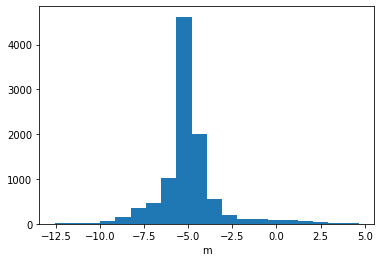

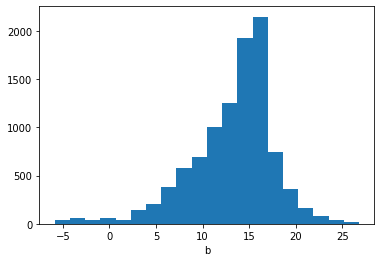

In [10]:
# Plot this stuff

#plt.savefig("param_walk.png")
fig2 = plt.figure(2)
plt.figure(2)
plt.hist(ps[:,0], bins=20)
plt.xlabel("m")
#plt.savefig("param_hist_m.png")

fig3=plt.figure(3)
plt.hist(ps[:,1], bins=20)
plt.xlabel("b");
#plt.savefig("param_hist_b.png")